In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
import matplotlib.collections
from scipy.interpolate import interp1d
sns.set()
from results import load
from matplotlib.lines import Line2D

from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from mpl_toolkits.axes_grid1.colorbar import colorbar

#constants
experiment_phase = {'p0':60000, 'p1':60000, 'p2':180000}
experiment_phase_labels = [*experiment_phase]

#avoid Font-problem in plots for ACM/IEEE papers
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

sns.set_context("talk", font_scale=1.6)

# Reading the results

In [14]:
#config
experiment_name = "full"
load_raw = False
all = None
providers = None
num_repetitions = None
configs = None

if load_raw:

    providers = ["aws","azure","ibm","gcf"] 
    num_repetitions = 1
    configs = ["0,0,1", "0,0,2","0,0,0.5","60,60,1","60,60,0.5"]


    all = load(experiment_name, providers,configs,num_repetitions,True)
    all.to_csv("results/full.csv")
else :
    all = pd.read_csv("results/full.csv")#
    providers = all["Provider"].unique()
    num_repetitions = all["run"].max()
    configs = all["WL"].unique()

all.columns


Index(['Unnamed: 0', 'RId', 'WL', 'CId', 'CStart', 'ECost', 'DLat', 'ELat',
       'RFailed', 'Phase', 'RStart', 'EStart', 'EEnd', 'REnd', 'CNew', 'CPlat',
       'TLat', 'COs', 'RInput', 'Provider', 'RLat', 'BLat', 'RResult', 'run',
       'sourceFile', 'RCode', 'RSuccessed', 'HId'],
      dtype='object')

In [15]:
def plotWorkload(ax,data,label="Target Workload",interval=1000):
    data["RStart_1s"] = round(data["RStart"]/interval)
    lats = data.groupby(["RStart_1s"])['RId'].count().reset_index(name="workload")
    sns.lineplot(x="RStart_1s", y='workload', data=lats, color="gray",label=label,ax=ax)
    
def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import colorsys
    h = color.lstrip('#')
    
    c = tuple(int(h[i:i+2], 16) for i in (0, 2, 4))
    c = map(lambda x:min(x+10,255),c)
    c = map(lambda x:hex(x)[2:],c)
    return "#{}{}{}".format(*c)

In [16]:
#sns.set_palette(sns.color_palette("Paired"))

palette = sns.color_palette().as_hex()
style = {
    "aws":{
        "name":"AWS",
        "color":palette[8]
    },
    "ibm":{
        "name":"ICF",
        "color":palette[1]
    },
    "gcf":{
        "name":"GCF",
        "color":palette[2]
    },
    "azure":{
        "name":"MAF",
        "color":palette[4]
    },
    "CNew":{
        "New":"#0485d1",
        "Cold":"#0485d1",
        "Reused": "#fc5a50",
        "Warm": "#fc5a50"
    },
    #colors
    "Lats":{
        "Delivery Latency":"#d1ffbd",
        "Request-Response Latency":"#92a8d1",
        "Execution Latency":"#B1cbbb",
        "Backward Response Delivery Latency":"#89a203",
        "Delivery":"#89a203",
        "Delivery Latency":"#89a203",
        "Request-Response":"#92a8d1",
        "Execution":"#B1cbbb",
        "Backward Response Delivery":"#89a203",
        "DLat":"#89a203",
        "BLat":"#89a203",
        "RLat":"#92a8d1",
        "ELat":"#B1cbbb"
    },
    "Phases":{
        "p0":"#74B52F",
        "p2":"#2F74B5",
        "p1":"#B52F74",
        "warmup":"#74B52F",
        "cooldown":"#2F74B5",
        "scaling":"#B52F74"
    },
    #Strings
    "Names":{
        "DLat":"Delivery Latency",
        "RLat":"Request-Response Latency",
        "ELat":"Execution Latency",
        "BLat":"Backward Response Delivery Latency",
        "p0":"warmup",
        "p1":"scaling",
        "p2":"cooldown",
        "HId":"VM",
        "CId":"Container"
    }
    
}

hmcmp = [(1,1,1,1)]+sns.color_palette("OrRd", 10)

sns.set(style="whitegrid")




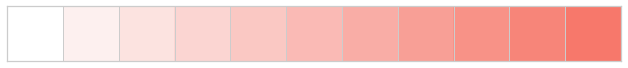

In [17]:
hmcmp = [(1,1,1,1),(0.996,0.945,0.941,1),(0.992,0.894,0.882,1),(0.988,0.839,0.824,1),(0.984,0.788,0.765,1),(0.984,0.733,0.710,1),(0.980,0.682,0.651,1),(0.976,0.627,0.592,1),(0.973,0.576,0.533,1),(0.969,0.522,0.475,1),(0.969,0.471,0.42,1),]
sns.palplot(hmcmp)

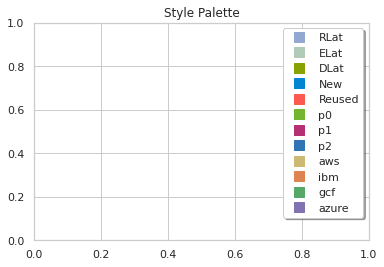

In [18]:
legendShapes = []
legendNames = []
for x in ["RLat","ELat","DLat"]:
    c = style["Lats"][x]
    legendShapes.append(Line2D([0], [0], marker='s', lw=0,color=c,markerfacecolor=c, markersize=10))
    legendNames.append(x)

for x in ["New","Reused"]:
    c = style["CNew"][x]
    legendShapes.append(Line2D([0], [0], marker='s', lw=0,color=c,markerfacecolor=c, markersize=10))
    legendNames.append(x)

for x in ["p0","p1","p2"]:
    c = style["Phases"][x]
    legendShapes.append(Line2D([0], [0], marker='s', lw=0,color=c,markerfacecolor=c, markersize=10))
    legendNames.append(x)

for x in ["aws","ibm","gcf","azure"]:
    c = style[x]["color"]
    legendShapes.append(Line2D([0], [0], marker='s', lw=0,color=c,markerfacecolor=c, markersize=10))
    legendNames.append(x)

fig,ax = plt.subplots()
ax.set_title("Style Palette")
ax.legend(legendShapes, legendNames,fancybox=True, shadow=True)

In [19]:
#this is important for phase based plots (leave it otherwise)
all = all[(all["Phase"] != "none")]

In [20]:
all.groupby(["Provider"])["RId"].count()/300

Provider
aws      335.250000
azure    328.716667
gcf      316.863333
ibm      335.653333
Name: RId, dtype: float64

### DLat vs Cold Start

In [21]:
def plotLatColdWarm(ax,all,provider,workload,lat="DLat",title=None):
    if title is None:
        ax.set_title("{} {}".format(style[provider]["name"],style["Names"][lat]))
    else:
        ax.set_title(title)
    data = all[(all["Provider"] == provider) & (all["WL"] == workload)]
    #data = data[data["DLat"].notna()]
    #data = data[data["RCode"] != 429] #filters filed requests e.g. azure
    #data = data[data["Phase"].isin(["p1","p2"])]

    data = data.replace({'CNew': "New"}, {'CNew': 'Cold'})
    data = data.replace({'CNew': "Reused"}, {'CNew': 'Warm'})
    data = data.rename(columns={"CNew":"Type"})
    sns.violinplot(x='Phase', y=lat,hue="Type", data=data,  scale='count',
                   cut=0,ax=ax,  inner='quartile',split=True,bw='scott',
                   scale_hue=True,palette=style["CNew"])

    #ax.set_yscale('log')

    ax.set_xlabel("Phases")
    ax.set_ylabel(r"Latency [s]")
    #ax.set_ylim([0,20])
    #highlight phases

    #ax.set_xticklabels(["p0","p1","p2","none"])

    delta = 0.02
    delta = 0.02
    inner = None
    #code for gap between violin halves, from stackoverflow.com/questions/43357274/
    for ii, item in enumerate(ax.collections):
    # axis contains PolyCollections and PathCollections
        if isinstance(item, matplotlib.collections.PolyCollection):
        # get path
            path, = item.get_paths()
            vertices = path.vertices

        # shift x-coordinates of path
            if not inner:
                if ii % 2: # -> to right
                    vertices[:,0] += delta
                else: # -> to left
                    vertices[:,0] -= delta
            else: # inner='box' adds another type of PollyCollection
                if ii % 3 == 0:
                    vertices[:,0] -= delta
                elif ii % 3 == 1:
                    vertices[:,0] += delta
                else: # ii % 3 = 2
                    pass

### Cost per Request

In [22]:
def costPerSecond(ax,all,workload,providers=["aws","azure","ibm","gcf"],title=None):
    
    data = all[(all["WL"] == workload)&(all["Provider"].isin(providers))]
    #plot
    data = data[data["RLat"].notna()]
    data = data[data["RCode"] != 429] #filters filed requests e.g. azure
    data = data[data["Phase"].isin(["p1","p2"])]
    
    data = data.replace({'Phase': "p1"}, {'Phase': style["Names"]["p1"]})
    data = data.replace({'Phase': "p2"}, {'Phase': style["Names"]["p2"]})
    
    sns.violinplot(x='Provider', y='ECost',hue="Phase", data=data,  inner='quartile',split=True,
                  palette=style["Phases"])


    # ax.set_xlim([0,300])
    ax.set_xlabel("Phases")
    ax.set_ylabel(r"Cost [$\mu$\$]")
    ax.set_ylim([0,600])
    ax.xaxis.set_ticklabels(map(lambda x:style[x.get_text()]["name"],ax.xaxis.get_ticklabels()))
    ax.grid(False)
    #title
    if title is None:
        ax.set_title("{} - Cost per Request".format(workload))
    else:
        ax.set_title(title)
    

### VM Usage

In [23]:
heatmap_cache = {}

In [24]:

def plotHeatmap(ax,all,provider,workload,selector="HId",cutoff=0.5,xlim=[0,300],title=None,vmax=None,cmap=sns.cubehelix_palette(8),draw_first=True,legend=True,show_cba=True):
    #filter data
    data = all[(all['Provider'] == provider) & (all["WL"] == workload)]
    data = data[["EStart","EEnd",selector,"RId"]].copy()
    #remove NAN
    data = data[data["EStart"].notna()]
    data = data.reset_index()
    #second buckets
    data["EStart"] = round(data["EStart"]/1000)
    data["EEnd"] = round(data["EEnd"]/1000)

    #remove lower 20%
    X = data.groupby(selector)["RId"].count().reset_index(name="c")
    X = X[X["c"] > X["c"].quantile(cutoff)]
    
    #small note, we compress the datas x-axis by to otherwiese the plot gets to wide
    
    heatmap = None
    firstStart = None
    cache_key = "{}-{}{}-{}{}".format(selector,cutoff,str(xlim),provider,workload)
    if cache_key in heatmap_cache:
        heatmap = heatmap_cache[cache_key][0]
        firstStart = heatmap_cache[cache_key][1]
    else:
        HIdEStart = {}
        X = round(data.groupby(selector)["EStart"].min()/2)
        for hid in data[selector].unique():
            if hid in X.index:
                HIdEStart[hid] = max(0,int(X.loc[hid])-1)

        HIdIndex = {}
        idx = 0
        for hid in sorted(HIdEStart.items(), key=lambda s:s[1]):
            HIdIndex[hid[0]] = idx
            idx+=1


        #create first-start marker map
        firstStart = np.zeros((len(HIdIndex),round(xlim[1]/2)))
        for hid in HIdIndex.keys():
            if hid in X.index:
                idx = min(max(0,int(X.loc[hid])-1),firstStart.shape[1]-1)
                firstStart[HIdIndex[hid],idx] = 1

        #create heatmap by counting each invocation from EStart to EEnd
        heatmap = np.zeros((len(HIdIndex),round(xlim[1]/2)))
        for i in range(1,len(data)):
            x = data.loc[i,[selector,"EStart","EEnd"]]
            if x[selector] in HIdIndex.keys():
                #lets not talk about the following hack ;)
                for j in np.arange(x["EStart"],min(xlim[1],x["EEnd"]),2,dtype=int):

                    heatmap[HIdIndex[x[selector]],j>>1] +=1
            
        heatmap_cache[cache_key] = (heatmap,firstStart)

    sns.heatmap(heatmap,ax=ax,cmap=cmap,linewidths=0,cbar=False,vmax=vmax)
    if draw_first:
#         highlight=[(1,1,1,0),(0.69,0.8,0.73,1)]
        highlight=[(1,1,1,0),(0.1,0.31,0.52,1)]
        sns.heatmap(firstStart,ax=ax,cmap=highlight,linewidths=0,cbar=False,vmin=0,vmax=1)
    if show_cba:
        ax_divider = make_axes_locatable(ax)
        # define size and padding of axes for colorbar
        cax = ax_divider.append_axes('right', size = '2.5%', pad = '1%')
        # make colorbar for heatmap. 
        # Heatmap returns an axes obj but you need to get a mappable obj (get_children)
        colorbar(ax.get_children()[0], cax = cax, orientation = 'vertical')
        # locate colorbar ticks
        cax.xaxis.set_ticks_position('top')
    ax.set_yticklabels([""])
    ax.set_xticks(ticks=[15,45,115])
    
    xticks = list(np.arange(0,round(xlim[1]/2)+1,30,dtype=int))
    #if not(round(xlim[1]/2) in xticks):
    xticks.append(round(xlim[1]/2))
    xticks.append(30)
    xticks.append(60)
    xticks = list(set(xticks))
    
    ax.set_xticks(ticks=xticks,minor=True)
    ax.set_xticklabels(map(lambda x:style["Names"][x],["p0","p1","p2"]),rotation='horizontal',fontsize=16)
    ax.set_xticklabels(map(lambda x:str(x*2),ax.get_xticks(minor=True)),minor=True,fontsize=15)
    ax.tick_params(axis='x', which='major', pad=15)
    if title is None:
        ax.set_title("{} [{}] - Parallel Requests per {} per Second".format(style[provider]["name"],workload,style["Names"][selector]))
    else:
        ax.set_title(title)
    ax.set_ylabel("Parallel Executions [#]",fontsize=20)
    ax.set_xlabel("Elapsed Time [s]",fontsize=20)
    
    ax.axvline(30,alpha=0.6,color="black")
    ax.axvline(60,alpha=0.6,color="black")
    if draw_first and legend:
        legendShapes = [Line2D([0], [0], marker='|', lw=0,color='blue',markerfacecolor='blue', markersize=10)]
        legendNames = ["First Occurrence"]
        ax.legend(legendShapes, legendNames,fancybox=True, shadow=True,facecolor='white')

## Failed Request

In [25]:

def plotFailedRequestPerSecond(ax,all,provider,workload,plot_target=True,label=None,title=None,no_legend=False,scale=1):
    data = all[(all['Provider'] == provider) & (all["WL"] == workload)]
    data = data.copy()
    if plot_target:
        plotWorkload(ax,data)
        
    data["RStart_1s"] = round(data["RStart"]/1000)
    #sum up cost
    data = data.groupby(["RStart_1s"])["RFailed"].sum().reset_index(name="RFailed")
    if label == None:
        label = "{}".format(style[provider]["name"])
    
    data = data[data["RFailed"] > 0]
    ax.scatter(x="RStart_1s", marker="+",y='RFailed', data=data, color="indianred",label=label,s=40*scale)
    ax.set_xlim([0,300])
    ax.set_xlabel("time [s]")
    ax.set_ylabel(r"failed requests [#]")

    #highlight phases
    ax.axvline(60,alpha=0.7,color="black")
    ax.axvline(120,alpha=0.7,color="black")
#     for i in range(0,300,20):
#         ax.axvline(i,alpha=0.2,color="black")
    
    ax.grid(False)
    ax.set_xticks(ticks=[30,90,210])
    ax.set_xticks(ticks=range(0,300,20),minor=True)
    ax.set_xticklabels(map(lambda x:style["Names"][x],["p0","p1","p2"]))
    ax.set_xticklabels(range(0,300,20),minor=True)
    ax.tick_params(axis='both', which='major', pad=15)
    if title is True:
        ax.set_title("{} - Failed Request per Second".format(style[provider]["name"]))
    else:
        ax.set_title(title)
        
    if no_legend:
        ax.legend([])
    #title
    

In [26]:
def q(x,name):
    def _q(n):
        return np.percentile(n,x)
    _q.__name__ = name
    return _q

def prepLatData(data,provider,workload,quantile_bar=10):
    data = all[(all["Provider"] == provider) & (all["WL"] == workload)]
    data = data[["RLat","ELat","DLat","BLat","EStart","Phase"]]
    data["EStart"] = round(data["EStart"]/1000)
    data = data.groupby("EStart")[["RLat","ELat","DLat","BLat"]].agg([np.median,np.max,np.min,np.mean,q(quantile_bar,"pa"),q(100-quantile_bar,"pb")])
    
    return data


def plotLineWithErrorBar(ax,data,color="lightblue",label=None,plot_quantile=False):
    ax.plot(data["median"],label=label,color=color,zorder=2)
    if plot_quantile:
        ax.plot(data["pa"],linestyle=":",color=color,alpha=0.65,zorder=3)
        ax.plot(data["pb"],linestyle=":",color=color,alpha=0.65,zorder=3)
    ax.fill_between(data.index,data["amax"],data["amin"],alpha=0.4,color=color,zorder=1)

def plotLatOverTime(ax,all,provider,workload,lat="DLat",title=None,label=None,no_labels=False,quantile_bar=10):
    data = prepLatData(all,provider,workload,quantile_bar)[lat]
    
    if label is None:
        label = "Median {0}".format(style["Names"][lat])
        

    plotLineWithErrorBar(ax,data,label=label,color=style["Lats"][lat])
    if not no_labels:
        ax.set_ylabel("{} in [s]".format(style["Names"][lat]))
        ax.set_xlabel("Time [s]")
        if title is None:
            ax.set_title("{} [{}] {} over Time".format(style[provider]["name"],workload,style["Names"][lat]))
        else:
            ax.set_title(title)
        ax.legend()
    else:
        ax.set_ylabel("")
        ax.set_xlabel("")
        ax.legend([])

def plotClientSideOverview(ax,data,provider,workload,title=False,legend=True,
                           ylim=[0,30],xlim=None,quantile_bar=10,plot_quantile=False,
                          with_thruput=False,scale=1):
    data = prepLatData(all,provider,workload,quantile_bar)[["ELat","RLat"]]
    ax2 = ax.twinx()
    plotLineWithErrorBar(ax2,data["ELat"],style["Lats"]["ELat"],style["Names"]["ELat"])
    plotLineWithErrorBar(ax2,data["RLat"],style["Lats"]["RLat"],style["Names"]["RLat"],plot_quantile=plot_quantile)
    ax2.set_ylabel(r"Latency [s]",fontsize=20*scale)
    ax2.tick_params(axis='x', labelsize=16*scale)
    ax2.grid(False)
    ax2.set_ylim(ylim)
    
    
    plotFailedRequestPerSecond(ax,all,provider,workload,label="Failed Requests",no_legend=True,title=None,scale=scale)
    
    if with_thruput:
        thruputPerSecondSimple(ax,all,provider,workload,scale)
        
    if xlim is None:
        xlim = [0,300]
    
    ax.set_xlim(xlim)
    ax.set_xlabel("Elapsed Time [s]",fontsize=20*scale)
    ax.set_ylabel(r"Requests [#]",fontsize=20*scale)

    #highlight phases
    ax.axvline(60,alpha=0.7,color="black")
    ax.axvline(120,alpha=0.7,color="black")
#     for i in range(0,xlim[1],20):
#         ax.axvline(i,alpha=0.1,color="black")

    ax.grid(False)
    ax.tick_params(axis='both', which='major', pad=15)
    ax.set_xticks(ticks=[30,90,210])
    ax.set_xticks(ticks=range(0,xlim[1]+1,20),minor=True)
    ax.set_xticklabels(map(lambda x:style["Names"][x],["p0","p1","p2"]),minor=False,fontsize=16*scale)
    #ax.set_xticklabels(range(0,xlim[1]+1,20),minor=True,fontsize=15*scale)
    ax.set_xticklabels([0,"","",60,"","",120,"","","","","","",260],minor=True,fontsize=15*scale)
    
    ax.tick_params(axis='both', labelsize=16*scale)
    if legend:
        lines, labels = ax.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax.legend(lines + lines2, labels + labels2,loc='center left', bbox_to_anchor=(1.15, 0.5),
                  ncol=1, fancybox=True, shadow=True)
    else:
        ax.get_legend().remove()
    
    if title is None:
        ax.set_title("{} [{}] Client-side Qualtites".format(style[provider]["name"],workload))
    else:
        ax.set_title(title)
        
    return ax,ax2


In [27]:
dlat_ylims = {
    "aws":{"0,0,0.5":[0,5],"0,0,1":[0,5],"0,0,2":[0,5],"60,60,0.5":[0,5],"60,60,1":[0,5]},
    "ibm":{"0,0,0.5":[0,5],"0,0,1":[0,5],"0,0,2":[0,5],"60,60,0.5":[0,5],"60,60,1":[0,5]},
    "azure":{"0,0,0.5":[0,30],"0,0,1":[0,30],"0,0,2":[0,30],"60,60,0.5":[0,30],"60,60,1":[0,30]},
    "gcf":{"0,0,0.5":[0,30],"0,0,1":[0,30],"0,0,2":[0,30],"60,60,0.5":[0,30],"60,60,1":[0,30]}
}
def thruputPerSecondSimple(ax,all,provider,workload,filter_failed=False,scale=1.0):
    data = all.copy()
    data = data[(data['Provider'] == provider) & (data["WL"] == workload)]
    if filter_failed:
        data = data[data["RFailed"] == False]
        
    data["REnd_1s"] = round(data["REnd"]/1000)
    data = data.groupby(["REnd_1s"])["RId"].count().reset_index(name="throughput")
    ax.scatter(x="REnd_1s",y="throughput",marker="o",data=data,
               label="Throughput",c=style[provider]["color"],s=12*scale)
    
def thruputPerSecond(ax,all,provider,workload,filter_failed=False,with_failed=True,with_dlat=True,title=None,xlim=[0,300]):
    data = all[(all['Provider'] == provider) & (all["WL"] == workload)]
    data = data.copy()
    
    if with_failed:
        plotFailedRequestPerSecond(ax,data,provider,workload,False,
                                   "Failed Requests",no_legend=True)
        

    if filter_failed:
        data = data[data["RFailed"] == False]
        
    data["REnd_1s"] = round(data["REnd"]/1000)
    plotWorkload(ax,data)
    #goup by second
    data = data.groupby(["REnd_1s","CNew"])["RId"].count().reset_index(name="throughput")
    #plot
    ax.scatter(x="REnd_1s",y="throughput",marker="o",data=data[data["CNew"] == "Reused"],
               label="Throughput (Warm)",c=style["CNew"]["Reused"],s=12)
    ax.scatter(x="REnd_1s",y="throughput",marker="s",data=data[data["CNew"] == "New"],
               label="Throughput (Cold)",c=style["CNew"]["New"],
               alpha=0.8,s=12)
    
    ax.set_xlim([0,300])
    ax.set_xlabel("Time [s]")
    ax.set_ylabel(r"Request [#]",fontsize=20)
    ax.set_ylim([0,180])
    
    #highlight phases
    ax.axvline(60,alpha=0.7,color="black")
    ax.axvline(120,alpha=0.7,color="black")
#     for i in range(0,300,20):
#         ax.axvline(i,alpha=0.1,color="black")
    
    ax.grid(False)
    ax.set_xticks(ticks=[30,90,210])
    ax.set_xticks(ticks=range(0,301,20),minor=True)
    ax.set_xticklabels(map(lambda x:style["Names"][x],["p0","p1","p2"]),minor=False)
    ax.set_xticklabels(ax.get_xticks(minor=True),minor=True)
    ax.tick_params(axis='both', which='major', pad=15)
    #ax.set_xticks(ticks=ylim,minor=True)
    ax2 = ax.twinx()
    if with_dlat:
        data = all[(all['Provider'] == provider) & (all["WL"] == workload)]
        data = data[["RLat","DLat","EStart","Phase"]]
        data["EStart"] = round(data["EStart"]/1000)
        data =data.groupby("EStart")[["RLat","DLat"]].agg([np.median,np.max,np.min,np.mean])
        plotLineWithErrorBar(ax2,data["DLat"],style["Lats"]["DLat"],style["Names"]["DLat"])
        #setting second y-axis limits
        ax2.set_ylim(dlat_ylims[provider][workload])
        ax2.set_ylabel("{} [s]".format(style["Names"]["DLat"]),fontsize=20)
        ax2.grid(False,"both")
    
    #title
    if title is None:
        ax.set_title("{} [{}] - Throughput per Second".format(style[provider]["name"],workload))
    else:
        ax.set_title(title)
        
    ax.set_xlim(xlim)
    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax.get_legend().remove()
    leg = ax2.legend(lines + lines2, labels + labels2,loc='upper left',
                  ncol=1, fancybox=True, shadow=True,facecolor="white")
    


In [28]:
#gloabl ylim conf for latancies 
ylims = {"aws":{"0,0,0.5":[0,5],"60,60,0.5":[0,5]},"ibm":{"0,0,0.5":[0,5],"60,60,0.5":[0,30]},"gcf":{"0,0,0.5":[0,20],"60,60,0.5":[0,20]},"azure":{"0,0,0.5":[0,30],"60,60,0.5":[0,30]}}

In [29]:
skip  = True
#experiment 1 graphs
ylims = {
        "aws":{"0,0,0.5":[0,3],"0,0,1":[0,3],"0,0,2":[0,3],"60,60,0.5":[0,3],"60,60,1":[0,3]},
        "ibm":{"0,0,0.5":[0,15],"0,0,1":[0,15],"0,0,2":[0,15],"60,60,0.5":[0,30],"60,60,1":[0,30]},
        "azure":{"0,0,0.5":[0,40],"0,0,1":[0,40],"0,0,2":[0,40],"60,60,0.5":[0,40],"60,60,1":[0,40]},
        "gcf":{"0,0,0.5":[0,30],"0,0,1":[0,30],"0,0,2":[0,30],"60,60,0.5":[0,30],"60,60,1":[0,30]}
}

def client_view_legend(ax):
    legendShapes = [
    Line2D([0], [0], color="gray", lw=2),
    Line2D([0], [0], marker='+', lw=0,color='indianred',markerfacecolor='indianred', markersize=10),
    Line2D([0], [0], color=style["Lats"]["RLat"], lw=2),
    Line2D([0], [0], color=style["Lats"]["ELat"], lw=2),
    ]
    legendNames = ["trps","RFailed","RLat","ELat",]
    ax2.legend(legendShapes, legendNames,loc="upper left",fancybox=True, shadow=True)


provider="azure"
if not skip: 
    for workload in configs:
        fig,ax = plt.subplots(figsize=(12,8))
        plt.suptitle("Client-View Impacts {} [{}]".format(style[provider]["name"],workload), fontsize=16,y=1.05)
        ax,ax2 = plotClientSideOverview(ax,all,provider,workload,
                    title="{}".format(style[provider]["name"]),legend=None,ylim=ylims[provider][workload])
        ax.set_xlim([0,280])


        client_view_legend(ax2)
        plt.suptitle("")
        ax.set_title("")
        plt.savefig("reports/CA-{}-{}.pdf".format(style[provider]["name"],workload), bbox_inches="tight")
        #plt.savefig("reports/ClientSideQA-{}-A.pdf".format(workload))
        #plt.close(fig)

# Masterplot V2

In [30]:
def client_view_legend(ax):
    legendShapes = [
    Line2D([0], [0], color="gray", lw=2),
    Line2D([0], [0], marker='+', lw=0,color='indianred',markerfacecolor='indianred', markersize=10),
    Line2D([0], [0], color=style["Lats"]["RLat"], lw=2),
    Line2D([0], [0], color=style["Lats"]["ELat"], lw=2),
    ]
    legendNames = ["trps","RFailed","RLat","ELat",]
    ax2.legend(legendShapes, legendNames,loc="upper left",fancybox=True, shadow=True)

In [31]:
def provider_view_legend(ax):
    legendShapes = [
    Line2D([0], [0], marker='|', lw=0,color='blue',markerfacecolor='blue', markersize=10),
    Line2D([0], [0], lw=2,color=hmcmp[1], linestyle='-', marker='o',
                    markersize=15, markerfacecoloralt=hmcmp[-1],fillstyle="bottom")
    ]
    legendNames = [
               "HStart","HHeat"
              ]
    ax.legend(legendShapes, legendNames,loc="lower left",fancybox=True, shadow=True) 

## Presentation Plots

In [39]:
def client_view_legend(ax):
    legendShapes = [
    Line2D([0], [0], color="gray", lw=2),
    Line2D([0], [0], marker='+', lw=0,color='indianred',markerfacecolor='indianred', markersize=10),
    Line2D([0], [0], color=style["Lats"]["RLat"], lw=2),
    Line2D([0], [0], color=style["Lats"]["ELat"], lw=2),
    ]
    legendNames = ["Target Request/s","Failed Requests","Client-side Request-\nResponse Latency",
                   "Function Execution\n Latency",]
    ax.legend(legendShapes, legendNames,loc="upper left",fancybox=True, shadow=True,fontsize=16)

    
def provider_view_legend(ax):
    legendShapes = [
    Line2D([0], [0], marker='|', lw=0,color='blue',markerfacecolor='blue', markersize=10),
    Line2D([0], [0], lw=2,color=hmcmp[1], linestyle='-', marker='o',
                    markersize=15, markerfacecoloralt=hmcmp[-1],fillstyle="bottom")
    ]
    legendNames = [
               "First Execution","Executions/s"
              ]
    ax.legend(legendShapes, legendNames,loc="lower left",fancybox=True, shadow=True,fontsize=16) 
cutoff=0.1
vmax=12
ylims = {
        "aws":{"0,0,2":[0,30]},
        "gcf":{"0,0,2":[0,30],}
}
pData = all[all["EStart"] < 280000]

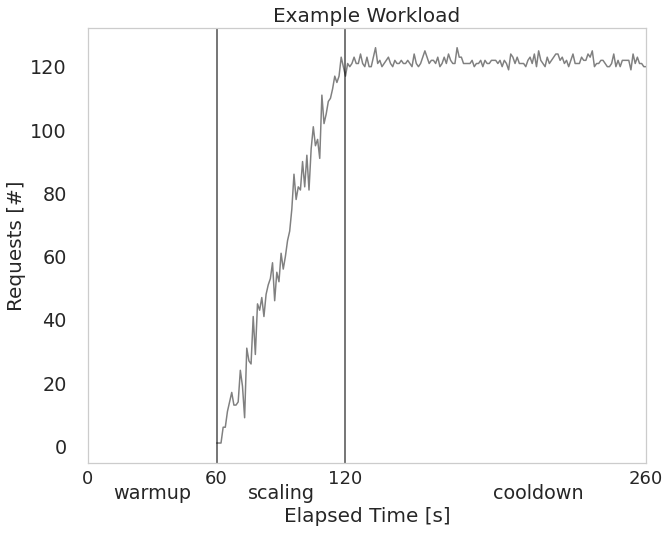

In [33]:
fig = plt.figure(figsize=(10,8))
gs = fig.add_gridspec(ncols=1, nrows=1)
provider = "aws"
workload="0,0,2"
scale=1.2

ax = fig.add_subplot(gs[0, 0])

data = pData[(pData['Provider'] == provider) & (pData["WL"] == workload)]
data = data.copy()
plotWorkload(ax,data)


#highlight phases
ax.axvline(60,alpha=0.7,color="black")
ax.axvline(120,alpha=0.7,color="black")
# for i in range(0,300,20):
#     ax.axvline(i,alpha=0.2,color="black")

ax.grid(False)
ax.set_xticks(ticks=[30,90,210])
ax.set_xticks(ticks=range(0,300,20),minor=True)
ax.set_xticklabels(map(lambda x:style["Names"][x],["p0","p1","p2"]))
ax.set_xticklabels([0,"","",60,"","",120,"","","","","","",260,""],minor=True)
ax.tick_params(axis='both', which='major', pad=15)

ax.tick_params(axis='both', which='major', labelsize=16*scale)
ax.tick_params(axis='both', which='minor', labelsize=15*scale)
ax.set_xlabel("Elapsed Time [s]",fontsize=20)
ax.set_ylabel(r"Requests [#]",fontsize=20)
ax.set_title("Example Workload",fontsize=20)
ax.set_xlim(0,260)
ax.get_legend().remove()
# plt.tight_layout()
plt.show()

fig.savefig("workload.pdf", bbox_inches="tight")
fig.savefig("workload.png", bbox_inches="tight")
plt.close(fig)

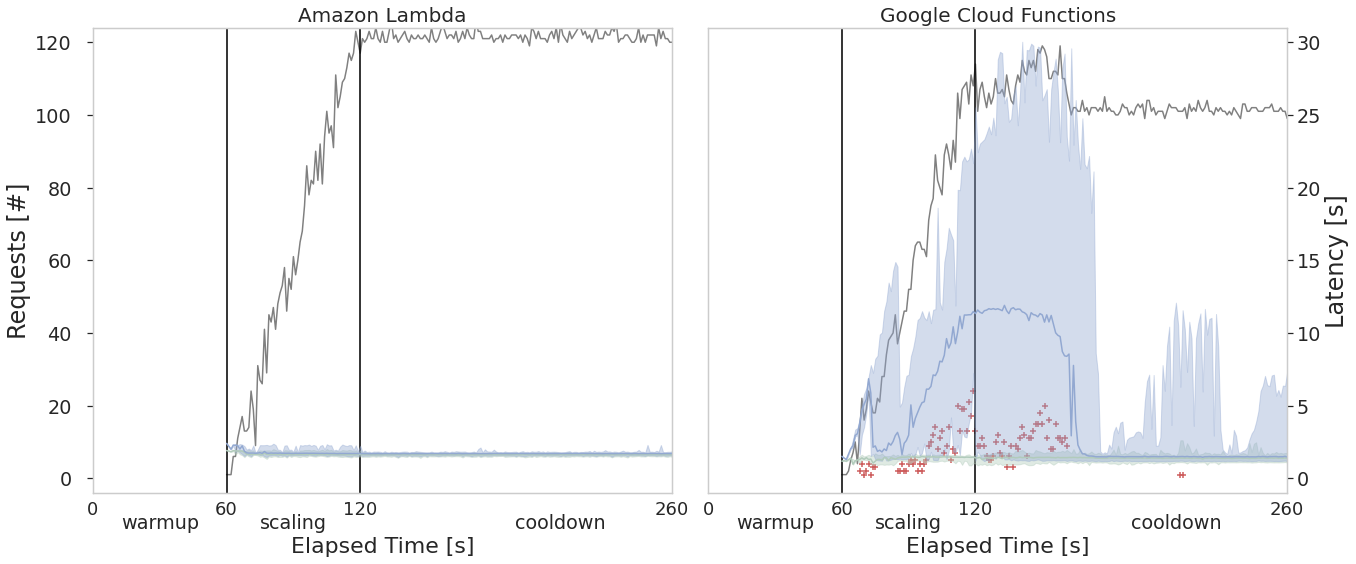

In [46]:
fig = plt.figure(figsize=(19,8))
gs = fig.add_gridspec(ncols=2, nrows=1)

xLabel=22
title= 20
scale=1.2

#plt.suptitle("Results for {} - {}".format(workload,style[provider]["name"]), fontsize=16,y=0.99)
provider = "aws"
workload="0,0,2"
ax = fig.add_subplot(gs[0, 0])
ax,ax2 = plotClientSideOverview(ax,pData,provider,workload,title=None,
                       legend=None,xlim=[0,260],ylim=ylims[provider][workload],scale=scale)
#client_view_legend(ax2)
ax.set_xlabel("Elapsed Time [s]",fontsize=xLabel)
ax.set_title("Amazon Lambda",fontsize=title)
ax2.set_ylabel("")
ax2.tick_params(axis='both', which='major', labelsize=16*scale)
ax2.set_ylim([-1,31])
ax2.set_yticklabels([])
ax2.set_yticks([])
ax.set_ylim([-4,124])
provider = "gcf"
workload="0,0,2"
ax = fig.add_subplot(gs[0, 1])
ax,ax2 = plotClientSideOverview(ax,pData,provider,workload,title=None,
                       legend=None,xlim=[0,260],ylim=ylims[provider][workload],scale=scale)
ax2.set_ylim([-1,31])
ax.set_yticklabels([])
ax.set_yticks([])
ax.set_ylim([-4,124])
ax.set_xlabel("Elapsed Time [s]",fontsize=xLabel)
ax.set_ylabel("")
ax.set_title("Google Cloud Functions",fontsize=title)
ax2.tick_params(axis='both', which='major', labelsize=16*scale)
# provider_view_legend(ax)
plt.tight_layout()
plt.show()

fig.savefig("elasticity_plot_slide13_wide.pdf", bbox_inches="tight")
fig.savefig("elasticity_plot_slide13_wide.png", bbox_inches="tight")
plt.close(fig)

            

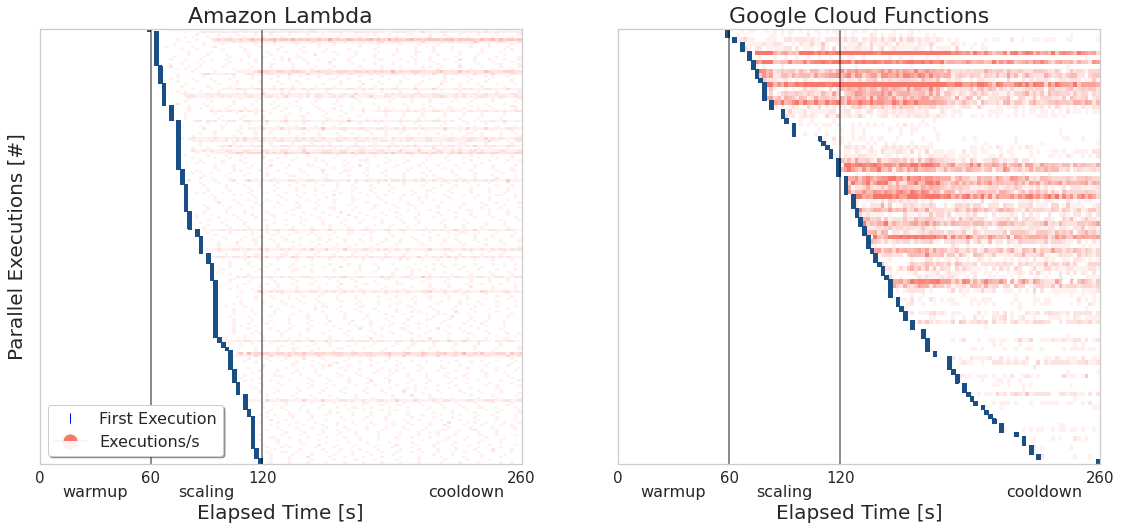

In [48]:
fig = plt.figure(figsize=(19,8))
gs = fig.add_gridspec(ncols=2, nrows=1)

xLabel=20
title= 20
scale=1.2

provider = "aws"
workload="0,0,2"
ax = fig.add_subplot(gs[0, 0])
plotHeatmap(ax,pData,provider,workload,cutoff=cutoff,xlim=[0,260],
            legend=False,title=None,cmap=hmcmp,vmax=vmax,show_cba=False)
ax.set_title("Amazon Lambda".format(style[provider]["name"],workload),fontsize=22)
ax.set_xlabel("Elapsed Time [s]",fontsize=20)

ax.set_xticklabels([0,260,"","",120,60],minor=True)
provider_view_legend(ax)
for _, spine in ax.spines.items():
    spine.set_visible(True)
    
provider = "gcf"
workload="0,0,2"
ax = fig.add_subplot(gs[0, 1])
plotHeatmap(ax,pData,provider,workload,cutoff=cutoff,xlim=[0,260],
            legend=False,title=None,cmap=hmcmp,vmax=vmax,show_cba=False)
ax.set_title("")
ax.set_xlabel("Elapsed Time [s]",fontsize=20)
ax.set_ylabel("")
for _, spine in ax.spines.items():
    spine.set_visible(True)
ax.set_xticklabels([0,260,"","",120,60],minor=True)
ax.set_title("Google Cloud Functions",fontsize=22)
#plt.tight_layout()
plt.show()

fig.savefig("elasticity_plot_slide14_wide_legend.pdf", bbox_inches="tight")
fig.savefig("elasticity_plot_slide14_wide_legend.png", bbox_inches="tight")
plt.close(fig)